Лабораторная роабота № 4

выполнил: Латыпов Альберт

Задание:

1.  На датасете 1 построить кривые обучения training score, cv score для двух различных алгоритмов. Сравнить и сделать выводы.
2.  На датасете 2 реализовать gridsearch для 2 параметров. Построить heatmap.

In [176]:
import pandas as pd
import numpy as np
import sklearn

# Задание 1:

In [177]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data',
                 names=col_names)

Первый датасет представляет собой выборку из 101 объекта. Каждый объект - определенное животное: антилопа, медведь, паук и др. Объясняющие переменные - характеристики животного: ядовито ли? сколько ног имеет? летает ли? и тд. Целевая переменная - один из семи классов к которому животное относится:

Class-- Set of animals:
===== =====================================================
1 -- (41) aardvark, antelope, bear, boar, buffalo, calf, cavy, cheetah, deer, dolphin, elephant, fruitbat, giraffe, girl, goat, gorilla, hamster, hare, leopard, lion, lynx, mink, mole, mongoose, opossum, oryx, platypus, polecat, pony, porpoise, puma, pussycat, raccoon, reindeer, seal, sealion, squirrel, vampire, vole, wallaby,wolf
2 -- (20) chicken, crow, dove, duck, flamingo, gull, hawk, kiwi, lark, ostrich, parakeet, penguin, pheasant, rhea, skimmer, skua, sparrow, swan, vulture, wren
3 -- (5) pitviper, seasnake, slowworm, tortoise, tuatara
4 -- (13) bass, carp, catfish, chub, dogfish, haddock, herring, pike, piranha, seahorse, sole, stingray, tuna
5 -- (4) frog, frog, newt, toad
6 -- (8) flea, gnat, honeybee, housefly, ladybird, moth, termite, wasp
7 -- (10) clam, crab, crayfish, lobster, octopus, scorpion, seawasp, slug, starfish, worm

In [15]:
col_names = ['1. animal name: Unique for each instance',
'2. hair: Boolean',
'3. feathers: Boolean',
'4. eggs: Boolean',
'5. milk: Boolean',
'6. airborne: Boolean',
'7. aquatic: Boolean',
'8. predator: Boolean',
'9. toothed: Boolean',
'10. backbone: Boolean',
'11. breathes: Boolean',
'12. venomous: Boolean',
'13. fins: Boolean',
'14. legs: Numeric (set of values: {0,2,4,5,6,8})',
'15. tail: Boolean',
'16. domestic: Boolean',
'17. catsize: Boolean',
'18. type: Numeric (integer values in range [1,7])']

In [178]:
df.head(5)

,1. animal name: Unique for each instance,2. hair: Boolean,3. feathers: Boolean,4. eggs: Boolean,5. milk: Boolean,6. airborne: Boolean,7. aquatic: Boolean,8. predator: Boolean,9. toothed: Boolean,10. backbone: Boolean,11. breathes: Boolean,12. venomous: Boolean,13. fins: Boolean,"14. legs: Numeric (set of values: {0,2,4,5,6,8})",15. tail: Boolean,16. domestic: Boolean,17. catsize: Boolean,"18. type: Numeric (integer values in range [1,7])"
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [179]:
df.drop(['1. animal name: Unique for each instance'],axis =1, inplace=True)

In [180]:
y = df['18. type: Numeric (integer values in range [1,7])']
X = df.drop(['18. type: Numeric (integer values in range [1,7])'],axis =1)

In [181]:
from sklearn import *
X_tr, X_ts, y_tr, y_ts = sklearn.model_selection.train_test_split(X, y, test_size=.3, random_state=42)

In [182]:
# Обучим на разделенной выборке классификатор Случайный лес, задав 100 деревьев, с макисмальной глубиной 2
rfc = sklearn.ensemble.RandomForestClassifier(n_estimators=100, max_depth=2,
                              random_state=0)

In [184]:
rfc.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [60]:
rfc.predict(X_ts)

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 2, 6, 2, 7, 1, 1, 2, 4, 1, 4, 4,
       4, 2, 1, 7, 6, 1, 1, 1, 2], dtype=int64)

In [185]:
# Получили вот такую точность:
rfc.score(X_ts, y_ts)

0.8064516129032258

In [186]:
# Теперь, воспользуемся кросс-валидацией и построим график точности модели в зависимости от размера тренировочной выборки:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(estimator = rfc, X=X,
                                                        y=y, cv=10, train_sizes=np.linspace(.1, 1.0, 40))

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:3449: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


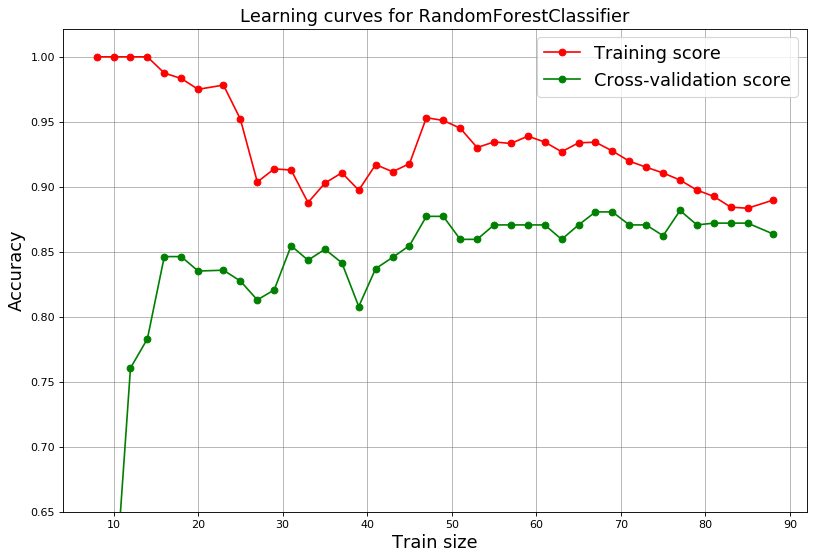

In [187]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",

label="Training score")

plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",

label="Cross-validation score")

plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title('Learning curves for RandomForestClassifier', fontsize=16)
plt.xlabel('Train size', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(ymin=0.65)
plt.legend(fontsize=16)
plt.show()

In [188]:
# Проделаем аналогичные действия для Наивного байесовского классификатора со чтандартными параметрами:
from sklearn.naive_bayes import GaussianNB
nb = sklearn.naive_bayes.GaussianNB()
nb.fit(X_tr, y_tr)

GaussianNB(priors=None, var_smoothing=1e-09)

In [189]:
# точность:
nb.score(X_ts, y_ts)

0.9354838709677419

In [190]:
nb.predict(X_ts)

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4, 5,
       5, 6, 1, 7, 6, 3, 1, 1, 2], dtype=int64)

In [191]:
# кросс валидация:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(estimator = nb, X=X,
                                                        y=y, cv=10, train_sizes=np.linspace(.1, 1.0, 40))

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


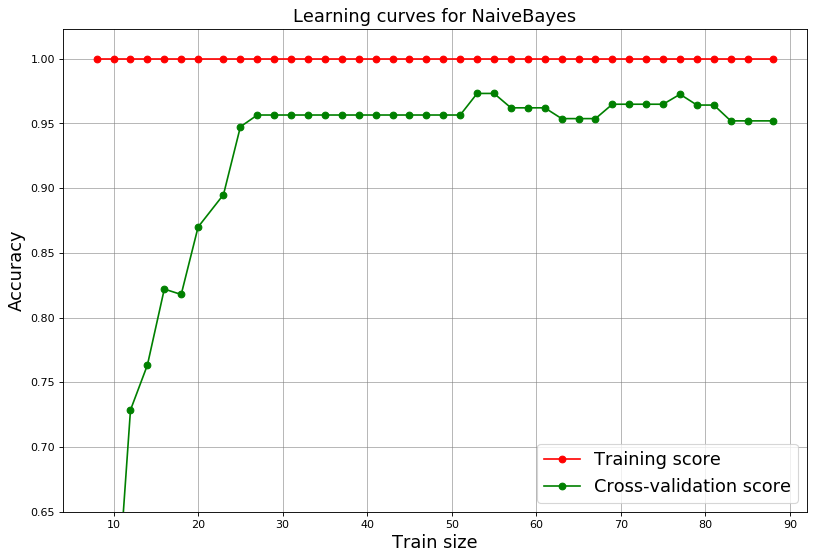

In [193]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color="r",

label="Training score")

plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color="g",

label="Cross-validation score")

plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.title('Learning curves for NaiveBayes', fontsize=16)
plt.xlabel('Train size', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim(ymin=0.65)
plt.legend(fontsize=16)
plt.show()

Выводы:
    1. на графике для RandomForestClassifier приблизительный максимум точности на кросс-валидации достигается при размере тестовой выборки 15; далее, c увеличением размера выборки, точность улучшается незначительно. Кривые не плавные, а ломанные, т.е. точность алгоритма сильно скачет, это свидетельствует о маленькои размере общей выборки (всего 101 объект); может быть к этому так же ведет сильный дисбаланс в классах (1 - 41 объект, 3 - 5 объектов).
   2. На графике для NaiveBayes оприблизительный максимум точности на кросс-валидации достигается при размере тестовой выборки 25. Точность выше, чем у RandomForestClassifier, значит, предположение, что данные независимы здесь подтверждается. Коридор не сужается к концу, в отличии от случайного леса. Кривая обучения строго единица. Честно, не знаю с чем это связанно, возможно особенность самого алгоритма.


# Задание 2:



Второй датасет содержит информацию о качестве вина: плотность, кислотность, % алкоголя и др. Целевая переменная - качество вина, оценка от 1 до 10. Маштабируем данные и разобъем на тестовую и тренировочную:

In [294]:
df2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')

In [90]:
df2.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [238]:
#Всего 1599 сущностей и 11 характеристик
df2.shape

(1599, 12)

In [295]:
y = df2['quality']
X = df2.drop(['quality'],axis=1)

In [296]:
scaler = sklearn.preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [297]:
X_tr, X_ts, y_tr, y_ts = sklearn.model_selection.train_test_split (X, y, test_size=.3, random_state=42)

In [302]:
KNC = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', p=2)
KNC.fit(X_tr, y_tr)
y_pred = KNC.predict(X_ts)
KNC.score(X_ts, np.ravel(y_ts))
# Точность без поиска по grid search

0.6354166666666666

In [312]:
from sklearn.metrics import confusion_matrix , classification_report
confusion_matrix(y_pred, np.ravel(y_ts))
# так как в целевой переменной встречаются только значения 3,4,5,6,7,8, то матрица ошибок получилась 6 на 6:

array([[  0,   0,   1,   0,   0,   0],
       [  0,   1,   1,   1,   0,   0],
       [  0,   7, 139,  47,   2,   0],
       [  1,   9,  49, 128,  22,   1],
       [  0,   0,   5,  24,  36,   4],
       [  0,   0,   0,   0,   1,   1]], dtype=int64)

In [311]:
print(classification_report(y_pred, np.ravel(y_ts)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.06      0.33      0.10         3
           5       0.71      0.71      0.71       195
           6       0.64      0.61      0.62       210
           7       0.59      0.52      0.55        69
           8       0.17      0.50      0.25         2

   micro avg       0.64      0.64      0.64       480
   macro avg       0.36      0.45      0.37       480
weighted avg       0.66      0.64      0.64       480



In [243]:
# Определим лучшие из параметров: n_neighbours - кол во соседей (от 1 до 10), p- параметр, определяющий метрику( от 1 до 10)
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[x for x in range(1,11)], 
              'p':[x for x in range(1,11)]}
KNC = sklearn.neighbors.KNeighborsClassifier( weights='distance' )
clf = GridSearchCV(KNC, parameters, cv=5)
clf.fit(X,y)

c:\users\альберт\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [263]:
clf.best_params_

{'n_neighbors': 8, 'p': 6}

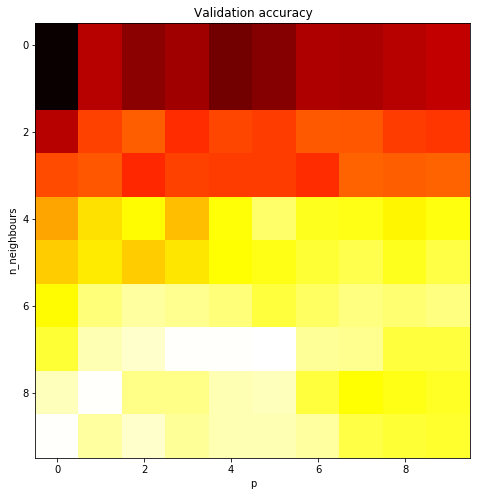

In [306]:

result_scores = clf.cv_results_['mean_test_score'].reshape(10,10)

plt.figure(figsize=(8, 8))
plt.imshow(result_scores, interpolation='nearest', cmap=plt.cm.hot)
plt.title('Validation accuracy')
 

plt.xlabel('p')
plt.ylabel('n_neighbours')
plt.show()

# шкалы смещены на -1 :

In [310]:
KNC_best = sklearn.neighbors.KNeighborsClassifier( n_neighbors=8, p=6, weights='distance' )
KNC_best.fit(X_tr, y_tr)
# Итоговый результат для тестовой выборки после поиска наилучших параметров:
print(KNC_best.score(X_ts,y_ts))

0.6416666666666667


Вывод: для классификации качества вина был выбран метод ближайших соседей. Классификатор был обучен на стандартных параметрах:
n_neighbors=5  - количество соседей; weights='distance' - вес соседа, определяется, как 1/ расстояние; p=2 - евклидова метрика.

После была составлена сетка параметров n_neighbors, p. Вариантов, при которых классификатор выдает лучший результат, было несколько, один из них: {'n_neighbors': 8, 'p': 6}. 

Алгоритм улучшил работу на 0.05. В целом точность низкая, что свидетельствует о том, что данный алгоритм плохо работает на предложенном датасете.